<a href="https://www.kaggle.com/code/ansamelmenshawy/nlp-project?scriptVersionId=181675626" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/txt-sentoken/poldata.README.2.0
/kaggle/input/txt-sentoken/txt_sentoken/pos/cv175_6964.txt
/kaggle/input/txt-sentoken/txt_sentoken/pos/cv905_29114.txt
/kaggle/input/txt-sentoken/txt_sentoken/pos/cv478_14309.txt
/kaggle/input/txt-sentoken/txt_sentoken/pos/cv872_12591.txt
/kaggle/input/txt-sentoken/txt_sentoken/pos/cv631_4967.txt
/kaggle/input/txt-sentoken/txt_sentoken/pos/cv855_20661.txt
/kaggle/input/txt-sentoken/txt_sentoken/pos/cv380_7574.txt
/kaggle/input/txt-sentoken/txt_sentoken/pos/cv740_12445.txt
/kaggle/input/txt-sentoken/txt_sentoken/pos/cv004_11636.txt
/kaggle/input/txt-sentoken/txt_sentoken/pos/cv439_15970.txt
/kaggle/input/txt-sentoken/txt_sentoken/pos/cv768_11751.txt
/kaggle/input/txt-sentoken/txt_sentoken/pos/cv902_12256.txt
/kaggle/input/txt-sentoken/txt_sentoken/pos/cv533_9821.txt
/kaggle/input/txt-sentoken/txt_sentoken/pos/cv619_12462.txt
/kaggle/input/txt-sentoken/txt_sentoken/pos/cv328_10373.txt
/kaggle/input/txt-sentoken/txt_sentoken/pos/cv540_3421.txt

In [2]:
import os
import zipfile
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

Training Accuracy: 0.9675
Testing Accuracy: 0.8525
Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       201
           1       0.82      0.90      0.86       199

    accuracy                           0.85       400
   macro avg       0.86      0.85      0.85       400
weighted avg       0.86      0.85      0.85       400



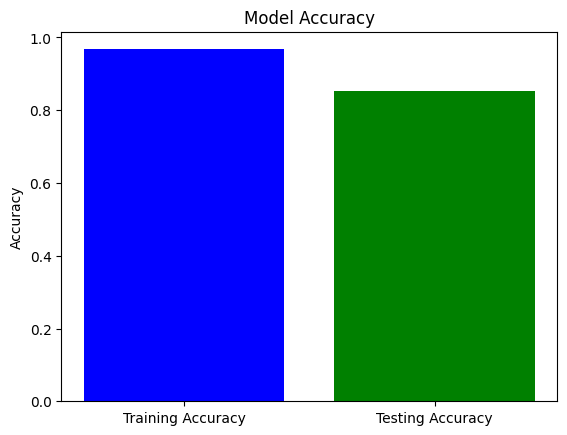

In [3]:
data_folder = "/kaggle/input/txt-sentoken/txt_sentoken"
texts = []
labels = []

for sentiment in ["pos", "neg"]:
    folder_path = os.path.join(data_folder, sentiment)
    files = os.listdir(folder_path)
    for file in files:
        with open(os.path.join(folder_path, file), "r") as f:
            texts.append(f.read())
            labels.append(1 if sentiment == "pos" else 0)

# Step 3: Feature Engineering
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X = vectorizer.fit_transform(texts)
#X has a shape of (number_of_documents, number_of_features) number_of_features = max_features

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Step 5: Model Training
model = SVC(kernel="linear")
model.fit(X_train, y_train)

# Step 6: Evaluation
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Classification Report
print("Classification Report for Testing Data:")
print(classification_report(y_test, y_pred_test))

# Visualization
labels = ["Training Accuracy", "Testing Accuracy"]
accuracies = [train_accuracy, test_accuracy]
plt.bar(labels, accuracies, color=["blue", "green"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.show()

Model: SVC Linear
Training Accuracy: 0.9675
Testing Accuracy: 0.8525

Model: SVC RBF
Training Accuracy: 0.99125
Testing Accuracy: 0.8575

Model: Random Forest
Training Accuracy: 1.0
Testing Accuracy: 0.8275

Model: Gradient Boosting
Training Accuracy: 0.976875
Testing Accuracy: 0.83



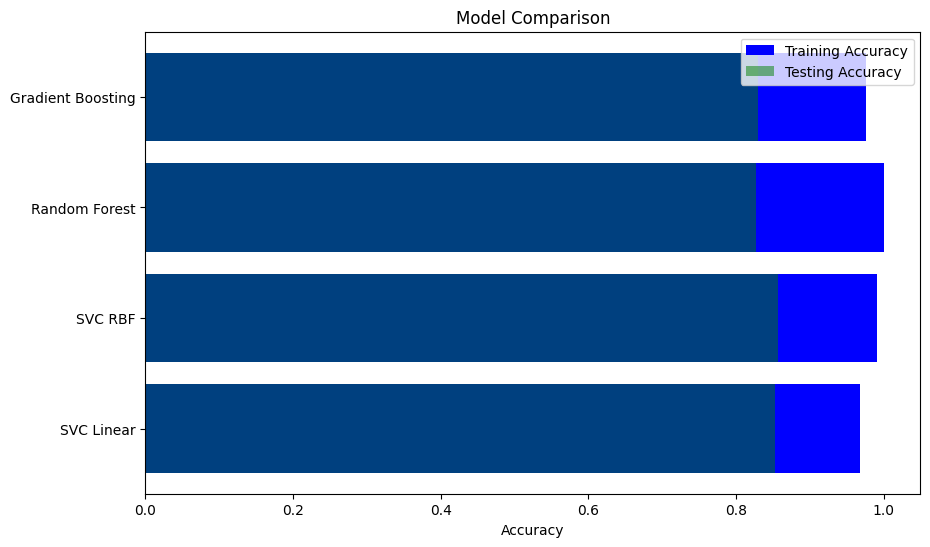

In [4]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# Step 5: Model Training

# Initialize a dictionary to store the models
models = {
    "SVC Linear": SVC(kernel="linear"),
    "SVC RBF": SVC(kernel="rbf"),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    # Add more models as needed
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    results[name] = {"Train Accuracy": train_accuracy, "Test Accuracy": test_accuracy}

# Print the results
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Training Accuracy: {result['Train Accuracy']}")
    print(f"Testing Accuracy: {result['Test Accuracy']}")
    print()

# Visualization
train_accuracies = [result["Train Accuracy"] for result in results.values()]
test_accuracies = [result["Test Accuracy"] for result in results.values()]

plt.figure(figsize=(10, 6))

plt.barh(list(models.keys()), train_accuracies, color="blue", label="Training Accuracy")
plt.barh(list(models.keys()), test_accuracies, color="green", label="Testing Accuracy", alpha=0.5)

plt.xlabel("Accuracy")
plt.title("Model Comparison")
plt.legend()
plt.show()


Training Accuracy: 0.500625
Testing Accuracy: 0.4975
Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       201
           1       0.50      1.00      0.66       199

    accuracy                           0.50       400
   macro avg       0.25      0.50      0.33       400
weighted avg       0.25      0.50      0.33       400



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


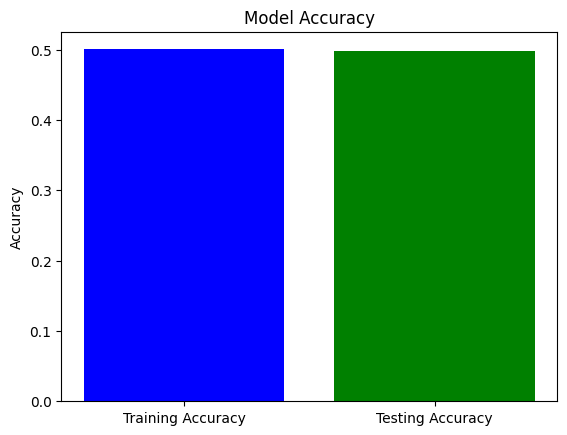

In [5]:
# Step 5: Model Training
model = SVC(kernel='sigmoid', gamma='auto')
model.fit(X_train, y_train)

# Step 6: Evaluation
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Classification Report
print("Classification Report for Testing Data:")
print(classification_report(y_test, y_pred_test))

# Visualization
labels = ["Training Accuracy", "Testing Accuracy"]
accuracies = [train_accuracy, test_accuracy]
plt.bar(labels, accuracies, color=["blue", "green"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.show()

Model: SVC Linear
Training Accuracy: 0.9675
Testing Accuracy: 0.8525

Model: SVC RBF
Training Accuracy: 0.99125
Testing Accuracy: 0.8575

Model: Random Forest
Training Accuracy: 1.0
Testing Accuracy: 0.81

Model: Gradient Boosting
Training Accuracy: 0.980625
Testing Accuracy: 0.84

Model: Logistic Regression
Training Accuracy: 0.934375
Testing Accuracy: 0.8475

Model: Decision Tree
Training Accuracy: 1.0
Testing Accuracy: 0.595



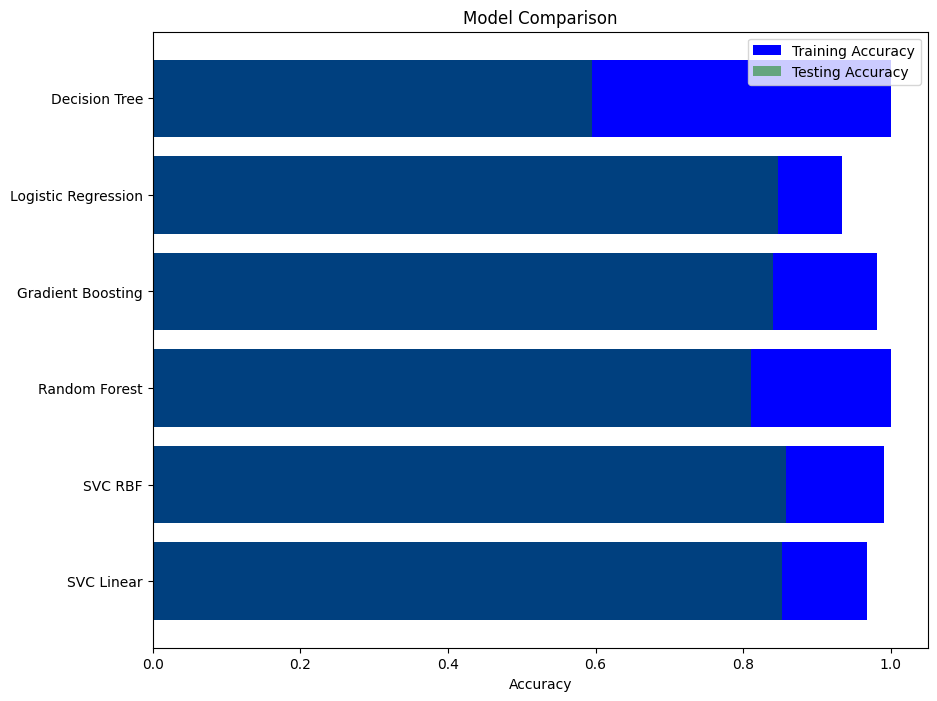

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Step 5: Model Training

# Initialize a dictionary to store the models
models = {
    "SVC Linear": SVC(kernel="linear"),
    "SVC RBF": SVC(kernel="rbf"),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier()
    # Add more models as needed
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    results[name] = {"Train Accuracy": train_accuracy, "Test Accuracy": test_accuracy}

# Print the results
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Training Accuracy: {result['Train Accuracy']}")
    print(f"Testing Accuracy: {result['Test Accuracy']}")
    print()

# Visualization
train_accuracies = [result["Train Accuracy"] for result in results.values()]
test_accuracies = [result["Test Accuracy"] for result in results.values()]

plt.figure(figsize=(10, 8))

plt.barh(list(models.keys()), train_accuracies, color="blue", label="Training Accuracy")
plt.barh(list(models.keys()), test_accuracies, color="green", label="Testing Accuracy", alpha=0.5)

plt.xlabel("Accuracy")
plt.title("Model Comparison")
plt.legend()
plt.show()


In [7]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'svm_model.pkl')

# Load the saved model
loaded_model = joblib.load('svm_model.pkl')

# Now you can use the loaded_model for predictions
